In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
db = pd.read_csv('/kaggle/input/obesity-classification-dataset/Obesity Classification.csv')
db

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


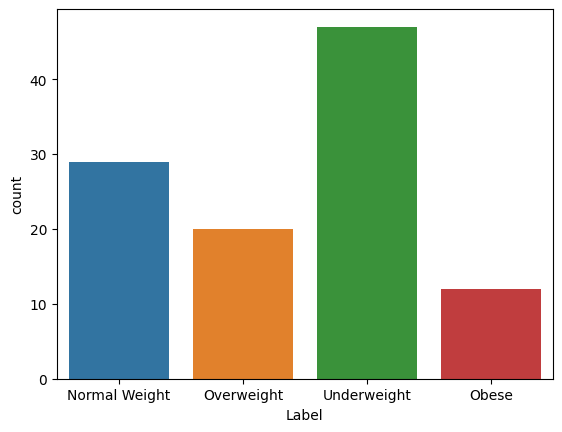

In [3]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Label', data=db)

In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [5]:
# Drop the "ID" and "Gender" columns from the dataset
db.drop(["ID", "Gender"], axis=1, inplace=True)
db.head()

,Age,Height,Weight,BMI,Label
0,25,175,80,25.3,Normal Weight
1,30,160,60,22.5,Normal Weight
2,35,180,90,27.3,Overweight
3,40,150,50,20.0,Underweight
4,45,190,100,31.2,Obese


# **Oversampling**
***SMOTE***
* The Smote helps to make the results have a more balanced number
* Its a oversampling technic and it creates more observations where the data is close.


In [6]:
#smote
X = db.drop('Label', axis = 1)
y = db['Label']

In [7]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [8]:
db = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
db.head(2)

,Age,Height,Weight,BMI,Label
0,25,175,80,25.3,Normal Weight
1,30,160,60,22.5,Normal Weight


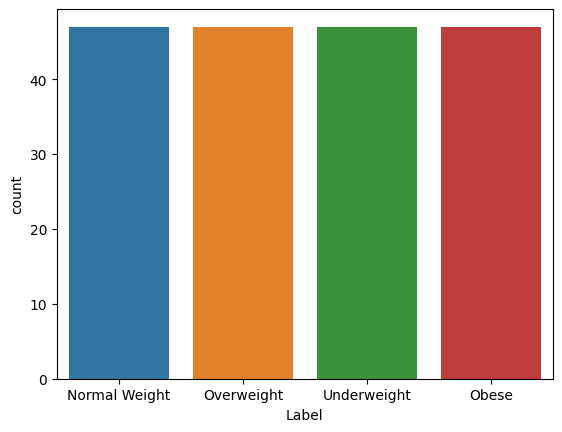

In [9]:
#now the variables are balanced
ax = sns.countplot(x='Label', data=db)  

# KNN K-NEAREST NEIGHBORS
* We need to scale

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
norm = StandardScaler()
X_norm = norm.fit_transform(X)
X_norm

array([[-1.12635529,  0.04602127,  0.23659768,  0.19351639],
       [-0.91396332, -0.46492359, -0.44614006, -0.18458251],
       [-0.70157135,  0.21633623,  0.57796655,  0.46358703],
       [-0.48917938, -0.80555349, -0.78750893, -0.52217081],
       [-0.27678741,  0.55696614,  0.91933542,  0.99022477],
       [-0.06439544, -1.1461834 , -1.1288778 , -0.96778737],
       [ 0.14799653,  0.89759604,  1.26070429,  1.39533073],
       [ 0.3603885 , -1.48681331, -1.47024667, -1.42690745],
       [ 0.57278047,  1.23822595,  1.60207316,  1.80043669],
       [ 0.78517244, -1.82744322, -1.81161554, -1.87252401],
       [-1.42370405,  0.04602127, -0.10477119, -0.06305072],
       [-1.21131208, -0.46492359, -0.78750893, -0.52217081],
       [-0.99892011,  0.21633623,  0.23659768,  0.19351639],
       [-0.78652814, -0.80555349, -0.44614006, -0.18458251],
       [-0.57413617,  0.55696614,  0.57796655,  0.46358703],
       [-0.3617442 , -1.1461834 , -0.78750893, -0.52217081],
       [-0.14935223,  0.

In [12]:
X_norm[0]

array([-1.12635529,  0.04602127,  0.23659768,  0.19351639])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3, random_state = 123)

# Train/test

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(metric = 'euclidean')

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [18]:
predict_knn = knn.predict(X_test)
predict_knn

array(['Obese', 'Obese', 'Normal Weight', 'Obese', 'Obese', 'Obese',
       'Overweight', 'Normal Weight', 'Overweight', 'Overweight',
       'Overweight', 'Normal Weight', 'Obese', 'Underweight',
       'Normal Weight', 'Obese', 'Underweight', 'Underweight', 'Obese',
       'Normal Weight', 'Normal Weight', 'Overweight', 'Underweight',
       'Overweight', 'Overweight', 'Normal Weight', 'Obese',
       'Underweight', 'Overweight', 'Obese', 'Obese', 'Obese', 'Obese',
       'Normal Weight', 'Underweight', 'Obese', 'Obese', 'Obese',
       'Overweight', 'Overweight', 'Underweight', 'Normal Weight',
       'Overweight', 'Normal Weight', 'Underweight', 'Normal Weight',
       'Underweight', 'Overweight', 'Obese', 'Underweight', 'Overweight',
       'Normal Weight', 'Underweight', 'Overweight', 'Obese',
       'Overweight', 'Obese'], dtype=object)

In [19]:
np.median(X_train)

0.04602127476995554

In [20]:
from sklearn.naive_bayes import BernoulliNB

In [21]:
bnb = BernoulliNB(binarize = 0.046)

In [22]:
bnb.fit(X_train, y_train)

BernoulliNB(binarize=0.046)

In [23]:
predict_BNb = bnb.predict(X_test)

In [24]:
predict_BNb

array(['Obese', 'Obese', 'Normal Weight', 'Overweight', 'Obese', 'Obese',
       'Overweight', 'Underweight', 'Overweight', 'Overweight',
       'Overweight', 'Underweight', 'Overweight', 'Underweight',
       'Overweight', 'Obese', 'Underweight', 'Normal Weight', 'Obese',
       'Underweight', 'Underweight', 'Obese', 'Underweight', 'Overweight',
       'Overweight', 'Underweight', 'Overweight', 'Normal Weight',
       'Overweight', 'Obese', 'Obese', 'Obese', 'Obese', 'Underweight',
       'Normal Weight', 'Overweight', 'Obese', 'Obese', 'Overweight',
       'Overweight', 'Normal Weight', 'Normal Weight', 'Obese',
       'Normal Weight', 'Underweight', 'Normal Weight', 'Underweight',
       'Overweight', 'Obese', 'Underweight', 'Underweight',
       'Normal Weight', 'Underweight', 'Overweight', 'Obese',
       'Overweight', 'Obese'], dtype='<U13')